# U.S. oil and gas Production analysis

Analysing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

---

Let's load the Gas production:

In [2]:
file = "data/U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")

## Some quick checks
the first lines, its shape, columns and data types 

In [3]:
gas_df.head(5)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881
3,2008-09-01,63984,9221,1316,1032,2953,2100,6447,657,1276,542,20435,5224,224,260,4069,330,2960,4049,890
4,2008-10-01,69464,9674,1375,1026,3113,4368,6909,692,1241,543,21948,5126,236,267,4168,330,3718,3860,870


In [4]:
gas_df.shape

(121, 20)

In [5]:
gas_df.columns

Index(['Month', 'U.S.', 'Alaska', 'Arkansas', 'Kansas', 'Other States',
       'Federal Offshore--Gulf of Mexico', 'Wyoming', 'West Virginia', 'Utah',
       'Pennsylvania', 'Texas', 'Oklahoma', 'Ohio', 'North Dakota',
       'New Mexico', 'Montana', 'Louisiana', 'Colorado', 'California'],
      dtype='object')

In [6]:
gas_df.dtypes[0:2]

Month    object
U.S.      int64
dtype: object

## Data preparation
Let us convert the column "Month" from object to pandas datetime timestamp (it will still contain the whole date, not only the month):

In [7]:
gas_df['Month']=gas_df['Month'].apply(pd.to_datetime)

Production year can be accessed by ".year", month by ".month" and the day by ".day"

In [8]:
gas_df['Month'].dt.year.head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Month, dtype: int64

---

## Yearly Gas production
To get the yearly production, we group by the year, and sum the amounts.



In [9]:
gas_df_year = gas_df.rename(columns={'Month': 'Year'})
yearly_gas_df = gas_df_year.groupby(gas_df_year['Year'].dt.year).sum()
del gas_df_year

In [10]:
yearly_gas_df

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Year,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723


Let us only use now full years, from 2009 to 2017. The corresponding indices are:

In [11]:
full_years = np.logical_and(yearly_gas_df.index >= 2009,
                            yearly_gas_df.index <= 2017)

And the data over those years can be stored at:

In [12]:
full_yearly_gas_df = yearly_gas_df[full_years]

In [13]:
full_yearly_gas_df

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Year,,,,,,,,,,,,,,,,,,,
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723
2017,1090730,106969,23050,7247,17069,35592,56410,52609,10312,179644,260314,82616,58702,22577,43910,1577,69947,55546,6642


## Some charts
U.S. oil production, production of some specific states

### U.S. oil production

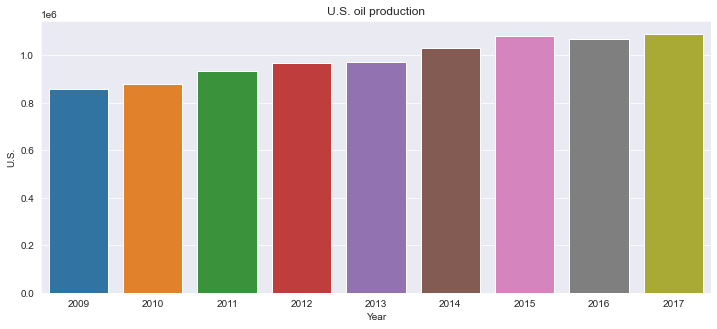

In [14]:
plt.figure(figsize=(12,5))
sns.barplot(y = full_yearly_gas_df['U.S.'], x = full_yearly_gas_df.index)
filtered_yearly_gas_df=full_yearly_gas_df
plt.title("U.S. oil production");

### State production

Let's have a look at the yearly production of some specific states

In [15]:
states = list(full_yearly_gas_df.columns[1:].sort_values())
print("Data is available in the following states:")
print(", ".join(states))

Data is available in the following states:
Alaska, Arkansas, California, Colorado, Federal Offshore--Gulf of Mexico, Kansas, Louisiana, Montana, New Mexico, North Dakota, Ohio, Oklahoma, Other States, Pennsylvania, Texas, Utah, West Virginia, Wyoming


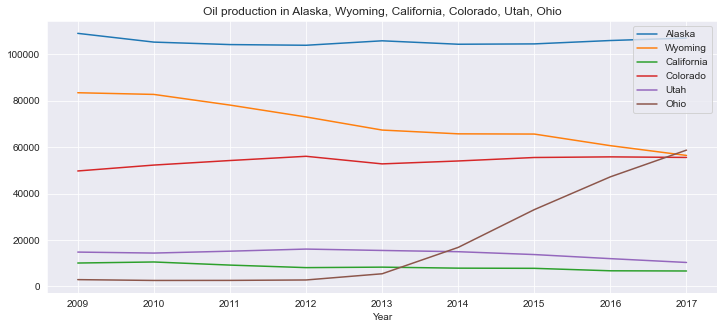

In [16]:
# line graph for the production of:
chosen_states = ['Alaska', 'Wyoming', 'California', 'Colorado', 'Utah', 'Ohio']

plt.figure(figsize=(12,5))
for state in chosen_states:
    full_yearly_gas_df[state].plot(kind='line')
plt.title("Oil production in " + ", ".join(chosen_states))
plt.legend();

---

## Comparing with Crude Oil Production
Loading the dataset to a Pandas DataFrame, converting to the 'Month' column to Pandas DateTime timestamp and showing the first 5 lines:

### Data preparation
Let's load the dataset and change the time column to Pandas DateTime timestamp.

In [17]:
oil_df = pd.read_csv("data/U.S._crude_oil_production.csv")

In [18]:
oil_df['Month'] = pd.to_datetime(oil_df['Month'], format='%Y-%m-%d')
oil_df.head()

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1
3,2008-09-01,3974,21,681,16,0,587,88,242,67,...,14,186,8,5,144,6,0,63,1055,1
4,2008-10-01,4738,21,716,17,0,586,86,803,66,...,14,185,8,5,145,6,0,64,1125,1


In [19]:
# let us rename 'Month' to 'Year' as we will group the observations
# by the year and sum them:
oil_df_year = oil_df.rename(columns={'Month': 'Year'})

# Let's calculate the annual production and choose only U.S. Crude Oil
yearly_oil = oil_df_year.groupby(oil_df_year['Year'].dt.year).sum()[['U.S. Crude Oil ']]
del oil_df_year

# and the yearly as production:
yearly_gas=yearly_gas_df[['U.S.']]

# with corresponding column names for the graphs later
yearly_gas.columns = ['Gas']
yearly_oil.columns = ['Crude Oil']

Let's merge the two DataFrames with annual data and see the data in a table:

In [20]:
merged_df = pd.concat([yearly_gas,yearly_oil], axis=1)
merged_df

,Gas,Crude Oil
Year,,
2008,489473,34211
2009,856876,64180
2010,881622,65741
2011,936163,67829
2012,968632,78007
2013,970617,89585
2014,1032439,105064
2015,1082158,113179
2016,1070085,105970


### A bar chart showing the Gas and Crude oil production

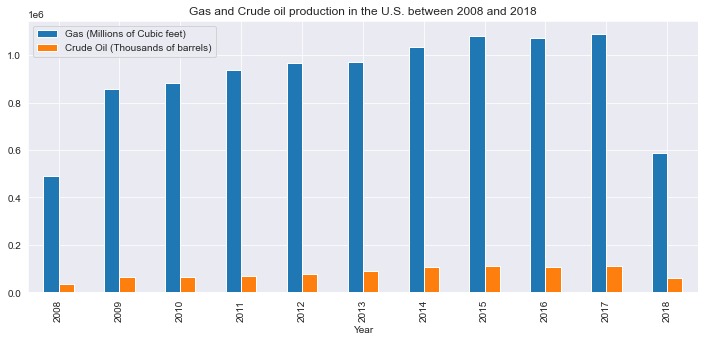

In [21]:
merged_df.plot(kind="bar",figsize=(12,5))
plt.title(f"Gas and Crude oil production in the U.S. between {merged_df.index.min()} and {merged_df.index.max()}")
plt.legend(['Gas (Millions of Cubic feet)', 'Crude Oil (Thousands of barrels)']);

### A scatter chart showing Gas vs Crude oil production

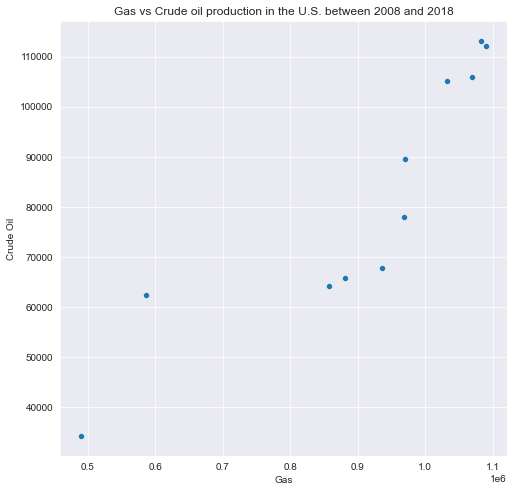

In [22]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = merged_df, x='Gas', y='Crude Oil')
plt.title(f"Gas vs Crude oil production in the U.S. between {merged_df.index.min()} and {merged_df.index.max()}");